In [14]:
import os
import time
import sys
sys.path.append("../src")

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
sns.set_style('whitegrid')
plt.rcParams['font.family'] = 'serif'

%matplotlib inline

result_dir = '../results/figures/'

In [2]:
%store -r data_unfiltered
method_1a = data_unfiltered

%store -r data_filtered
method_1b = data_filtered

%store -r data_unfiltered_ordinal
method_2a = data_unfiltered_ordinal

%store -r data_filtered_ordinal
method_2b = data_filtered_ordinal

In [3]:
def get_summary(df):
    # First, average across all volunteers for each channel
    channel_means = df.groupby('channel')[['ETC_EyesOpen', 'ETC_EyesClosed']].mean()

    # Now, for each state, calculate the mean and std dev of those channel averages
    eo_summary = channel_means['ETC_EyesOpen'].agg(['mean', 'std']).to_dict()
    ec_summary = channel_means['ETC_EyesClosed'].agg(['mean', 'std']).to_dict()

    summary = {
        'EO': eo_summary,
        'EC': ec_summary
    }
    return summary

In [4]:
summary1a = get_summary(method_1a)
summary1b = get_summary(method_1b)
summary2a = get_summary(method_2a)
summary2b = get_summary(method_2b)

In [ ]:
# Extract the 4 main values and their errors
labels = ['Unfiltered\nW/O Ordinal Analysis','Filtered\nW/O Ordinal Analysis','Unfiltered\nWith Ordinal Analysis','Filtered\nWith Ordinal Analysis']
summaries = [summary1a, summary1b, summary2a, summary2b]

eo_means = [s['EO']['mean'] for s in summaries]
ec_means = [s['EC']['mean'] for s in summaries]
eo_errors = [s['EO']['std'] for s in summaries]
ec_errors = [s['EC']['std'] for s in summaries]

In [5]:
# Extract the 4 main values and their errors
labels = ['Unfiltered','Filtered']
summaries = [summary1a, summary1b]

eo_means = [s['EO']['mean'] for s in summaries]
ec_means = [s['EC']['mean'] for s in summaries]
eo_errors = [s['EO']['std'] for s in summaries]
ec_errors = [s['EC']['std'] for s in summaries]

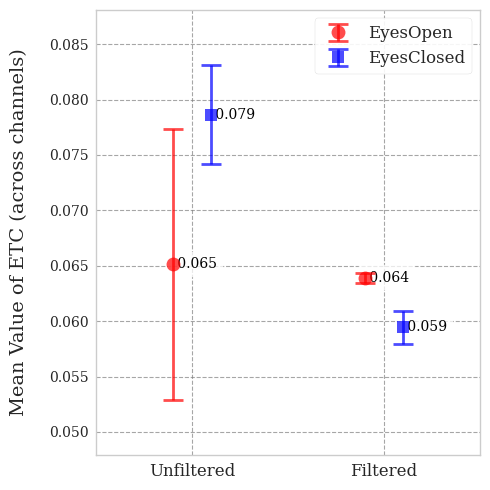

Plot generation complete.


In [24]:
##plt.style.use('seaborn-v0_8-whitegrid')
fig, ax = plt.subplots(figsize=(5, 5))

# Set up the positions for the markers
x = np.arange(len(labels))  # the label locations [0, 1]
offset = 0.1  # Offset for markers to avoid overlap

# Plot the markers with error bars
ax.errorbar(x - offset, eo_means, yerr=eo_errors, fmt='o',
            markersize=10, capsize=7, capthick=2, elinewidth=2,
            label='EyesOpen', color='red', alpha=0.7, markeredgecolor='black', zorder=10)

ax.errorbar(x + offset, ec_means, yerr=ec_errors, fmt='s', # 's' for square marker
            markersize=9, capsize=7, capthick=2, elinewidth=2,
            label='EyesClosed', color='blue', alpha=0.7, markeredgecolor='black', zorder=10)

# --- Formatting the plot to make it beautiful ---
ax.set_ylabel('Mean Value of ETC (across channels)', fontsize=14, labelpad=15)
##ax.set_title('Comparison of ETC for EO and EC', fontsize=16, pad=20, weight='bold')
ax.set_xticks(x)
ax.set_xticklabels(labels, fontsize=12)
ax.tick_params(axis='y', labelsize=10)
ax.legend(fontsize=12, frameon=True, framealpha=0.9, loc='best')

# Set a subtle background color
##ax.set_facecolor('#F8F9FA')
##fig.patch.set_facecolor('#F8F9FA')

# Make grid lines more subtle
ax.grid(axis='y', linestyle='--', color='gray', alpha=0.7)
ax.grid(axis='x', linestyle='--', color='gray', alpha=0.7)

# Adjust x and y-axis limits to give space for markers and error bars
ax.set_xlim(-0.5, len(labels) - 0.5)
# Calculate y-limits based on all data points and their errors
all_values = np.concatenate([
    np.array(eo_means) + np.array(eo_errors),
    np.array(eo_means) - np.array(eo_errors),
    np.array(ec_means) + np.array(ec_errors),
    np.array(ec_means) - np.array(ec_errors)
])
ax.set_ylim(all_values.min() - 0.005 , all_values.max() + 0.005)


# Add text labels for the mean values next to the markers
for i in range(len(labels)):
    ax.text(x[i] - offset, eo_means[i], f' {eo_means[i]:.3f}', va='center', ha='left', fontsize=10, color='black', backgroundcolor='#FFFFFFC0')
    ax.text(x[i] + offset, ec_means[i], f' {ec_means[i]:.3f}', va='center', ha='left', fontsize=10, color='black', backgroundcolor='#FFFFFFC0')

fig.tight_layout()   
timestr = time.strftime("%y%m%d-%H%M%S")
result_path = os.path.join(result_dir, f"method_comparision_{timestr}.png")
plt.savefig(result_path, dpi=300)
plt.show()

print("Plot generation complete.")